In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('ethereum-price-dataset-new.csv')
df.head()

,date,ether_price,daily_tx_volume,unqiue_address_count,network_hashes,marketcap,tx_fee,network_util,gas_used
0,7/30/2015,0.0,8893,8894,11.5297,0.0,0.0,0.0,0.0
1,7/31/2015,0.0,0,0,51.4594,0.0,0.0,0.0,0.0
2,8/1/2015,0.0,0,0,57.7845,0.0,0.0,0.0,0.0
3,8/2/2015,0.0,0,0,67.9224,0.0,0.0,0.0,0.0
4,8/3/2015,0.0,0,0,74.5737,0.0,0.0,0.0,0.0


In [4]:
df['date'] = pd.to_datetime(df['date']).astype('int64')
df.head()

,date,ether_price,daily_tx_volume,unqiue_address_count,network_hashes,marketcap,tx_fee,network_util,gas_used
0,1438214400000000000,0.0,8893,8894,11.5297,0.0,0.0,0.0,0.0
1,1438300800000000000,0.0,0,0,51.4594,0.0,0.0,0.0,0.0
2,1438387200000000000,0.0,0,0,57.7845,0.0,0.0,0.0,0.0
3,1438473600000000000,0.0,0,0,67.9224,0.0,0.0,0.0,0.0
4,1438560000000000000,0.0,0,0,74.5737,0.0,0.0,0.0,0.0


In [5]:
Y=df['ether_price']
X=df.drop('ether_price', axis=1).values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

Y_pred = rf_model.predict(X_test)
print(Y_pred)

In [17]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 200.12034155247392
Root Mean Squared Error (RMSE): 14.146389700290102


In [18]:
feature_importances = rf_model.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = df.drop('ether_price', axis=1).columns.tolist()
sorted_importances = feature_importances[sorted_indices]
feature_importance = []
feature_names = []

for feature, importance in zip(sorted_features, sorted_importances):
    feature_names.append(feature) 
    feature_importance.append(importance) 
    print(f"{feature} : {importance}")

date : 0.9988906664421217
daily_tx_volume : 0.0004431225308812028
unqiue_address_count : 0.00029765650398946885
network_hashes : 0.00010146042802032759
marketcap : 7.593101331304114e-05
tx_fee : 7.388872916264332e-05
network_util : 6.968750946630001e-05
gas_used : 4.758684304537233e-05


In [19]:
import matplotlib.pyplot as plt

In [20]:
df['date'] = pd.to_datetime(df['date'], unit='ns')
df_2023 = df[df['date'].dt.year == 2023]

In [21]:
filtered_values = [value for value in Y_pred[:len(df_2023)] if 1000 <= value <= 4000]
filtered_dates = df_2023['date'][:len(filtered_values)]

In [ ]:
plt.plot(filtered_dates, filtered_values)
plt.xlabel('Date')
plt.ylabel('Ethereum Value (Y_pred)')
plt.title('Predicted Ethereum Values in 2023 (Filtered)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
predicted_dates = pd.date_range(start='2023-06-07', end='2023-07-30')
filtered_values1 = [value for value in Y_pred[:len(predicted_dates)] if 1000 <= value <= 4000]
filtered_dates1 = predicted_dates[:len(filtered_values1)]

plt.plot(filtered_dates1, filtered_values1)
plt.xlabel('Date')
plt.ylabel('Ethereum Price')
plt.title('Predicted Ethereum Prices from 6-7-2023 to 6-23-2023')
plt.xticks(rotation=45)
plt.show()

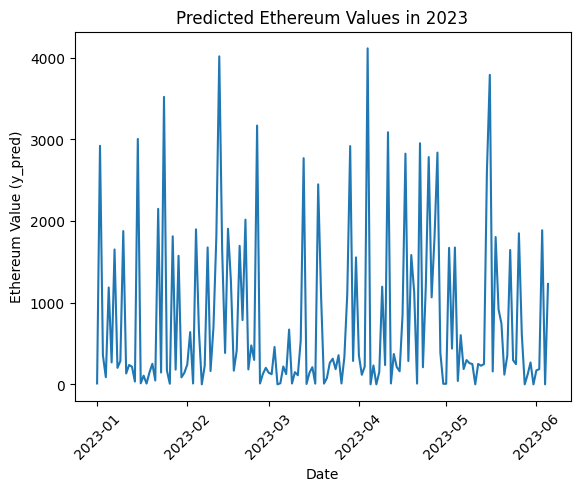

In [15]:
plt.plot(df_2023['date'], Y_pred[:len(df_2023)])
plt.xlabel('Date')
plt.ylabel('Ethereum Value (y_pred)')
plt.title('Predicted Ethereum Values in 2023')
plt.xticks(rotation=45)
plt.show()